In [3]:
import Bio
from Bio.Seq import Seq

In [6]:
DNA = Seq("ATGGACGCGTGCGAT")
print(DNA)

ATGGACGCGTGCGAT


In [14]:
#Menghitung Persentase GC dan AT dalam DNA : built-in dan user-defined
# Persentase GC dapat memengaruhi melting temperature DNA

# Built In
from Bio.SeqUtils import GC

persentase_gc = GC(DNA)
persentase_at = 100 - persentase_gc

print(persentase_gc)

60.0


c:\Users\Fidel\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\SeqUtils\__init__.py:146: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  BiopythonDeprecationWarning,


In [10]:
# User Defined

def GC_Counter(seq):
    gc = []

    for x in seq:
        if x == "G" or x == "C":
            gc.append(x)
    return len(gc)/len(seq)*100


# List Comprehension

def GC_Counter2(seq):
    gc = [x for x in seq if x in "GC"]
    return len(gc)/len(seq)*100

print(GC_Counter2(DNA))

60.0


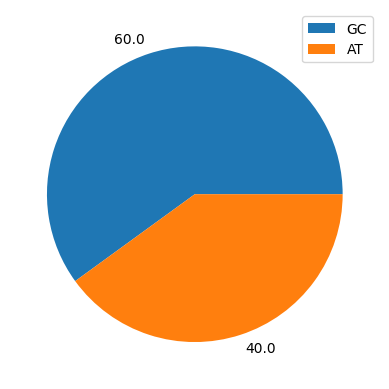

In [15]:
import matplotlib.pyplot as plt

plt.pie(x=[persentase_gc, persentase_at], labels=[persentase_gc, persentase_at])
plt.legend(["GC", "AT"])
plt.show()

In [16]:
# Melting point DNA
# built in
# user defined

from Bio.SeqUtils import MeltingTemp as mt

print(mt.Tm_GC(DNA)) # based on GC Composition of DNA
print(mt.Tm_NN(DNA)) # based on nearest neighbor thermodynamics
print(mt.Tm_Wallace(DNA)) # rule of thumb / pegangan

44.5029020719779
50.346125847238625
48.0


In [17]:
# Custom Wallace

def Custom_Wallace(seq):
    jumlahA = seq.count("A")
    jumlahG = seq.count("G")
    jumlahT = seq.count("T")
    jumlahC = seq.count("C")

    if (len(seq) < 14):
        return (jumlahA + jumlahT) * 2 + (jumlahG + jumlahC) * 4
    else:
        return round(64.9 + 41 * (jumlahG + jumlahC - 16.4) / (jumlahA + jumlahT + jumlahG + jumlahC), 2)
    
print(Custom_Wallace(DNA))

44.67


In [18]:
# molecular weight of a DNA
# molecular weight of each nucleotide

from Bio.SeqUtils import molecular_weight as mw

print(mw(DNA))

4712.995199999999


In [19]:
# Buat function yang dapat mengelompokkan nucleotida2 menjadi sebuah string masing masing

def nucleotide_string(seq, nucleotide):
    n = [x for x in seq if x in nucleotide]
    n_string = "".join(n)
    return n_string

print(mw(nucleotide_string(DNA, "GC")))

2860.7960999999996
